In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats as st
import itertools as it
from tqdm import notebook as tqdm
from matplotlib.animation import FuncAnimation
import random,os
import multiprocessing as mp
import modelutils
plt.ion()

In [2]:
npeople=60
ndays=21
ntrials = 5 #number of trials used to construct confidence intervals
locations=['Broad','Moore','Watson','Beckman','Noyes','Braun','Schlinger','Kerckhoff','Spalding','Chandler']

In [3]:
agent_locations,agent_states = modelutils.run_simulation(ndays,
                                                         npeople,
                                                         locations,
                                                         loctmats = [modelutils.loc_tmat(np.random.choice(np.arange(len(locations)-1)),totallocs=len(locations)-1,ff = x) for x in np.logspace(0,2,npeople)])
#agent_locations_nolunch,agent_states_nolunch = modelutils.run_simulation(ndays,npeople,locations,testsperday=0)  #the simulation will never hit this counter value

In [4]:
forecast_output = modelutils.forecast(100,agent_locations[-96:,...],locations,agent_states[0,...],np.ones(len(locations)))

MC Trial:  99 / 100


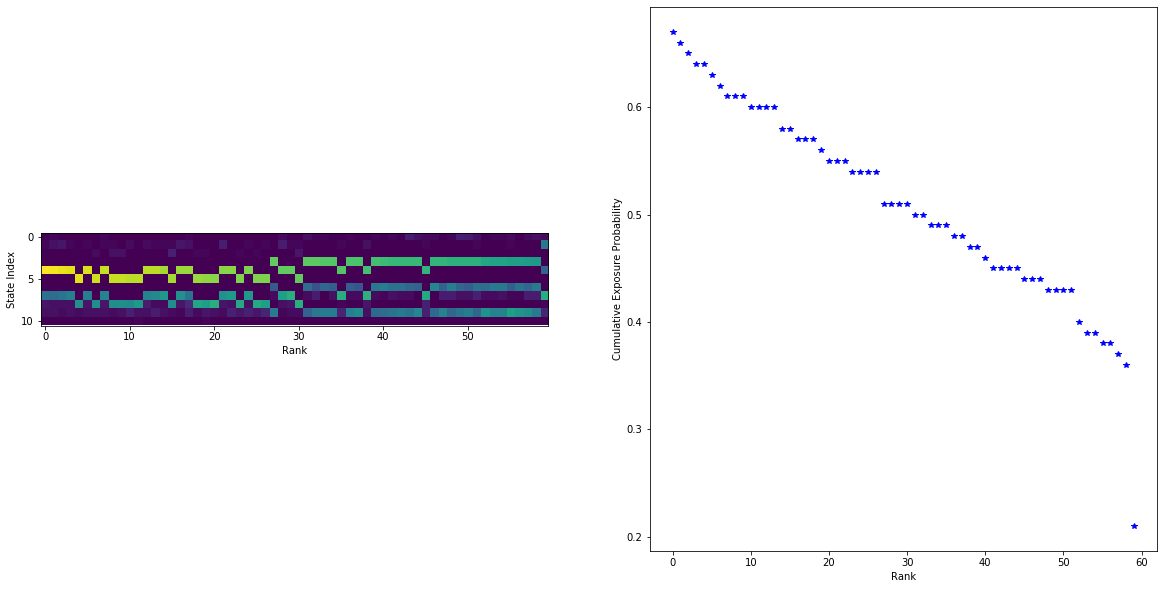

In [14]:
forecast_output.shape

fig,ax = plt.subplots(ncols=2,figsize=(20,10))

exposure_score = np.sum(forecast_output[3:6,:],axis=0)
forecast_output_sorted = forecast_output[:,np.flip(np.argsort(exposure_score))]
exposure_score_sorted = np.flip(np.sort(exposure_score))

ax[0].imshow(forecast_output_sorted)
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('State Index')
ax[1].plot(exposure_score_sorted,'*b')
ax[1].set_ylabel('Cumulative Exposure Probability')
ax[1].set_xlabel('Rank')
plt.savefig('forecast_fig.png')

In [6]:
# #UNCOMMENT FOR MOVEMENT DEMO

# ############################################################################


# def num2titlestr(n):
#     day = n//96
#     day_rem = n % 96
#     hours = day_rem // 12
    
#     fmt_hours = 9 + hours
#     if fmt_hours>12:
#         fmt_hours+=-12
#     fmt_hours= str(fmt_hours)
#     if len(fmt_hours)!=2:
#         fmt_hours = '0'+fmt_hours
    
#     hour_rem = day_rem % 12
#     minutes = hour_rem * 5
#     fmt_minutes = str(minutes)
#     if len(fmt_minutes) != 2:
#         fmt_minutes = '0'+fmt_minutes
#     return 'Day: '+str(day)+' / '+ fmt_hours+':'+fmt_minutes


# fig,ax = plt.subplots(figsize=[10,10])
# skip=12




# def update(i,skip=skip):
#     print('Step: ',i,' / ',agent_locations.shape[0],end='\r')
    
        
#     plot_indices = np.arange(0,i,step=skip)
        
#     ax.clear()

#     ax.set_title(num2titlestr(i))
    
    
#     disease_states = np.squeeze(agent_states[i//96,:,:])  #we need to "compress this one hot matrix (one hot along columns)"
#     disease_states = np.array([np.where(disease_states[:,x]==1)[0] for x in range(disease_states.shape[1])])
         
#     modelutils.draw_campus(agent_locations[i,:],disease_states,ax)
#     ax.axis('off')

    


    


# anim = FuncAnimation(fig, update, frames=np.arange(0,agent_locations.shape[0],skip), interval=200,repeat_delay=1000)

# anim.save('200707_movement.gif', dpi=80, writer='imagemagick')
# print('GIF Finished!')